# Runtime Vs Input Size for Each Question

In [6]:
import pandas as pd
from pathlib import Path

# Paths
base = Path(r"c:/Users/aadii/OneDrive/Desktop/Github/IIScFirstSem/IntrotoScalableSys")
q1_path = base / "GRAPHSIMP" / "outputs_q1.csv"
q2_path = base / "GRAPHSIMP" / "outputs_q2.csv"
q3_path = base / "GRAPHSIMP" / "outputs_q3.csv"
q1_path_copy = base / "GRAPHSIMP" / "outputs_q1 copy.csv"

def load(label, path):
    if not path.exists():
        raise FileNotFoundError("Missing {}: {}".format(label, path))
    df = pd.read_csv(path)
    print("Loaded {} (rows={}, cols={}): {}".format(
        label, len(df), len(df.columns), list(df.columns)))
    return df

q1_df = load("Q1", q1_path)
q2_df = load("Q2", q2_path)
q3_df = load("Q3", q3_path)
q1_df_c=load("Q1_copy",q1_path_copy)


Loaded Q1 (rows=100, cols=6): ['Test#', 'N(Packages)', 'Time(µs approx)', 'NumDuplicates', 'Memory(bytes)', 'Correct']
Loaded Q2 (rows=223324, cols=12): ['Test#', 'Query#', 'QueryListSize', 'Runtime(ms)', 'TreeSize', 'LeafCount', 'TotalQueries', 'Verification', 'MetroCities', 'TotalRuntimePerTest(ms)', 'AvgRuntimePerQuery(ms)', 'Memory(bytes)']
Loaded Q3 (rows=100, cols=9): ['Test#', 'Runtime(ms)', 'Nodes', 'Edges', 'MetroCount', 'Result(MeetTime)', 'Connected', 'Memory(bytes)', 'Verification']
Loaded Q1_copy (rows=20, cols=6): ['Test#', 'N(Packages)', 'Time(µs approx)', 'NumDuplicates', 'Memory(bytes)', 'Correct']


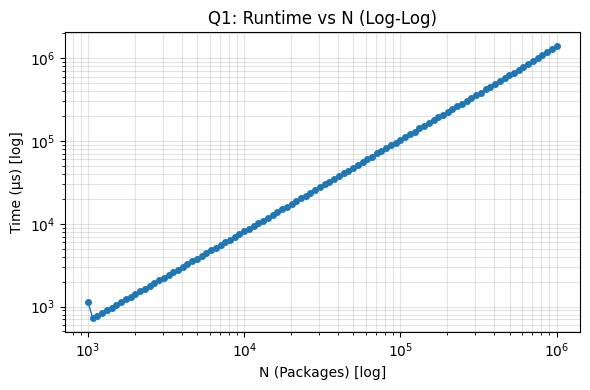

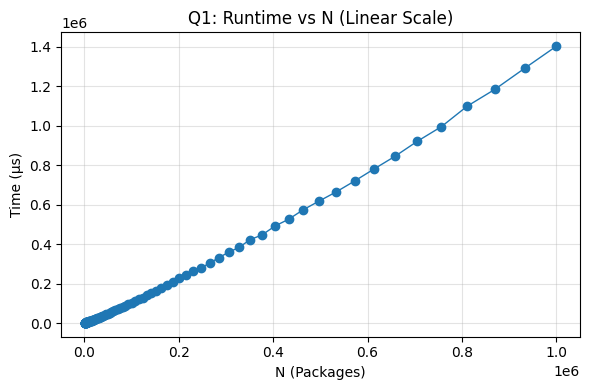

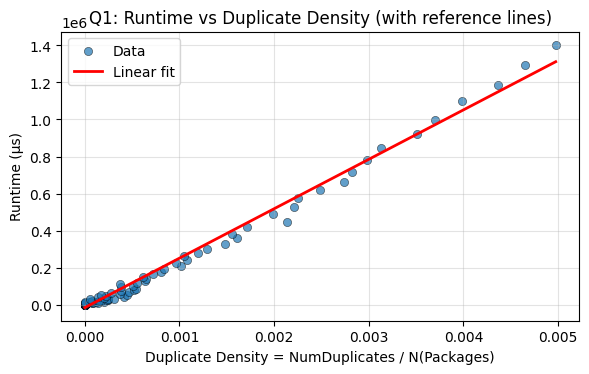

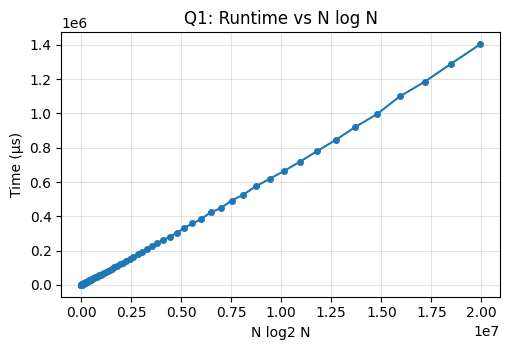

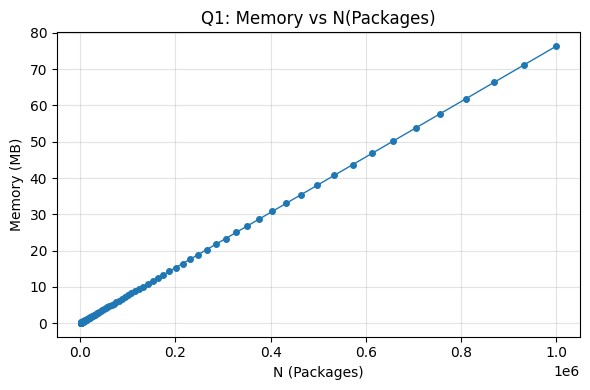

In [2]:
# New code cell: Log-scale plots for Q1

import matplotlib.pyplot as plt
import numpy as np

# Ensure required columns exist
if 'N(Packages)' not in q1_df.columns or 'Time(µs approx)' not in q1_df.columns:
    raise ValueError("Required columns not found in Q1 CSV")

x = q1_df['N(Packages)']
y_us = q1_df['Time(µs approx)']
y_ms = y_us / 1000.0

# 1. Log-Log (both axes)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y_us, marker='o', ms=4, lw=1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N (Packages) [log]')
ax.set_ylabel('Time (µs) [log]')
ax.set_title('Q1: Runtime vs N (Log-Log)')
ax.grid(alpha=0.35, which='both')
plt.tight_layout()
plt.show()


# Q1: Runtime vs N (linear (non-log) scale)
import matplotlib.pyplot as plt

if 'N(Packages)' not in q1_df.columns or 'Time(µs approx)' not in q1_df.columns:
    raise ValueError("Required columns missing for linear runtime plot.")

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(q1_df['N(Packages)'], q1_df['Time(µs approx)'], marker='o', lw=1)
ax.set_xlabel('N (Packages)')
ax.set_ylabel('Time (µs)')
ax.set_title('Q1: Runtime vs N (Linear Scale)')
ax.grid(alpha=0.35)

# Optional secondary y-axis in ms (uncomment if wanted)
# ax_ms = ax.twinx()
# ax_ms.set_ylabel('Time (ms)')
# ax_ms.set_ylim(ax.get_ylim()[0]/1000.0, ax.get_ylim()[1]/1000.0)

plt.tight_layout()
plt.show()

# Q1: Runtime vs Duplicate Density with reference lines
import numpy as np
import matplotlib.pyplot as plt

required_cols = {'N(Packages)', 'Time(µs approx)', 'NumDuplicates'}
missing = required_cols.difference(q1_df.columns)
if missing:
    raise ValueError("Missing columns: {}".format(missing))

q1_plot = q1_df[q1_df['N(Packages)'] > 0].copy()
q1_plot['DuplicateDensity'] = q1_plot['NumDuplicates'] / q1_plot['N(Packages)']

x = q1_plot['DuplicateDensity'].values
y = q1_plot['Time(µs approx)'].values

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y, s=35, alpha=0.7, edgecolor='k', linewidth=0.4, label='Data')

# Linear fit (least squares)
if len(x) >= 2 and np.any(x != x[0]):
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    ax.plot(xs, m*xs + b, color='red', lw=2, label='Linear fit')

ax.set_xlabel('Duplicate Density = NumDuplicates / N(Packages)')
ax.set_ylabel('Runtime (µs)')
ax.set_title('Q1: Runtime vs Duplicate Density (with reference lines)')
ax.grid(alpha=0.35)
ax.legend()
plt.tight_layout()
plt.show()

N = q1_df['N(Packages)'].astype(float).values
T = q1_df['Time(µs approx)'].astype(float).values
NlogN = N * np.log2(N)

# 1. Runtime vs N log N (should be ~linear)
plt.figure(figsize=(5.2,3.6))
plt.plot(NlogN, T, 'o-', ms=4)
plt.xlabel('N log2 N')
plt.ylabel('Time (µs)')
plt.title('Q1: Runtime vs N log N')
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()


# Q1 ONLY: Memory usage vs N(Packages)

import matplotlib.pyplot as plt
import pandas as pd

needed = {'N(Packages)', 'Memory(bytes)'}
missing = needed.difference(q1_df.columns)
if missing:
    raise ValueError("Missing columns for Q1 memory plot: {}".format(missing))

q1_mem = q1_df[['N(Packages)', 'Memory(bytes)']].copy()
q1_mem['Memory(bytes)'] = pd.to_numeric(q1_mem['Memory(bytes)'], errors='coerce')
q1_mem = q1_mem.dropna(subset=['Memory(bytes)'])
q1_mem['Memory(MB)'] = q1_mem['Memory(bytes)'] / (1024*1024.0)

# Linear scale
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(q1_mem['N(Packages)'], q1_mem['Memory(MB)'], marker='o', ms=4, lw=1)
ax.set_xlabel('N (Packages)')
ax.set_ylabel('Memory (MB)')
ax.set_title('Q1: Memory vs N(Packages)')
ax.grid(alpha=0.35)
plt.tight_layout()
plt.show()

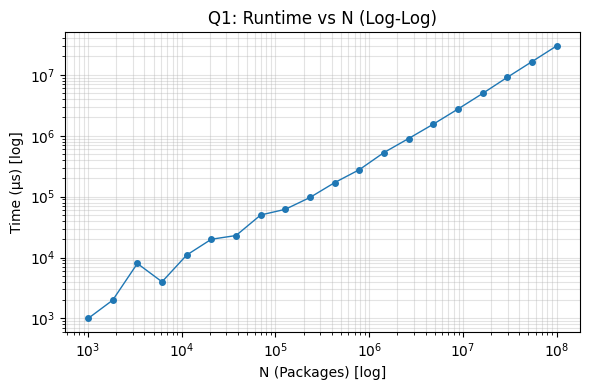

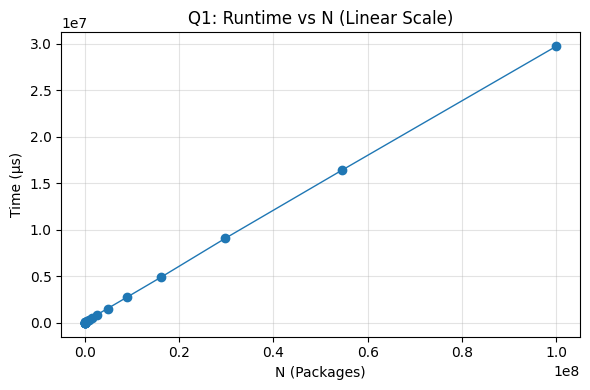

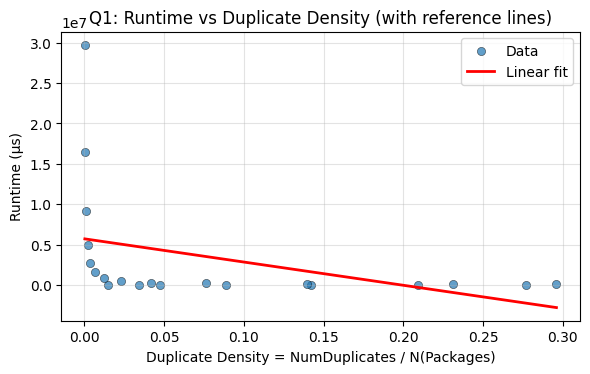

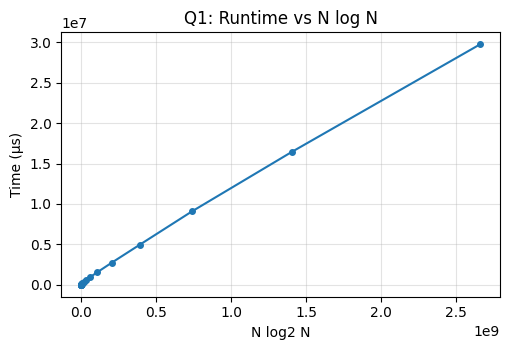

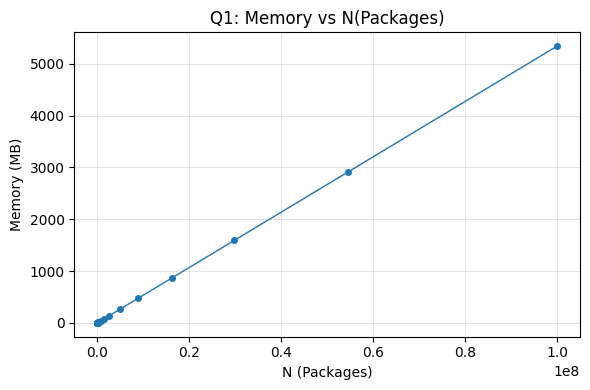

In [3]:
# New code cell: Log-scale plots for Q1

import matplotlib.pyplot as plt
import numpy as np

# Ensure required columns exist
if 'N(Packages)' not in q1_df_c.columns or 'Time(µs approx)' not in q1_df_c.columns:
    raise ValueError("Required columns not found in Q1 CSV")

x = q1_df_c['N(Packages)']
y_us = q1_df_c['Time(µs approx)']
y_ms = y_us / 1000.0

# 1. Log-Log (both axes)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y_us, marker='o', ms=4, lw=1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N (Packages) [log]')
ax.set_ylabel('Time (µs) [log]')
ax.set_title('Q1: Runtime vs N (Log-Log)')
ax.grid(alpha=0.35, which='both')
plt.tight_layout()
plt.show()


# Q1: Runtime vs N (linear (non-log) scale)
import matplotlib.pyplot as plt

if 'N(Packages)' not in q1_df_c.columns or 'Time(µs approx)' not in q1_df_c.columns:
    raise ValueError("Required columns missing for linear runtime plot.")

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(q1_df_c['N(Packages)'], q1_df_c['Time(µs approx)'], marker='o', lw=1)
ax.set_xlabel('N (Packages)')
ax.set_ylabel('Time (µs)')
ax.set_title('Q1: Runtime vs N (Linear Scale)')
ax.grid(alpha=0.35)

# Optional secondary y-axis in ms (uncomment if wanted)
# ax_ms = ax.twinx()
# ax_ms.set_ylabel('Time (ms)')
# ax_ms.set_ylim(ax.get_ylim()[0]/1000.0, ax.get_ylim()[1]/1000.0)

plt.tight_layout()
plt.show()

# Q1: Runtime vs Duplicate Density with reference lines
import numpy as np
import matplotlib.pyplot as plt

required_cols = {'N(Packages)', 'Time(µs approx)', 'NumDuplicates'}
missing = required_cols.difference(q1_df_c.columns)
if missing:
    raise ValueError("Missing columns: {}".format(missing))

q1_plot = q1_df_c[q1_df_c['N(Packages)'] > 0].copy()
q1_plot['DuplicateDensity'] = q1_plot['NumDuplicates'] / q1_plot['N(Packages)']

x = q1_plot['DuplicateDensity'].values
y = q1_plot['Time(µs approx)'].values

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y, s=35, alpha=0.7, edgecolor='k', linewidth=0.4, label='Data')

# Linear fit (least squares)
if len(x) >= 2 and np.any(x != x[0]):
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    ax.plot(xs, m*xs + b, color='red', lw=2, label='Linear fit')

ax.set_xlabel('Duplicate Density = NumDuplicates / N(Packages)')
ax.set_ylabel('Runtime (µs)')
ax.set_title('Q1: Runtime vs Duplicate Density (with reference lines)')
ax.grid(alpha=0.35)
ax.legend()
plt.tight_layout()
plt.show()

N = q1_df_c['N(Packages)'].astype(float).values
T = q1_df_c['Time(µs approx)'].astype(float).values
NlogN = N * np.log2(N)

# 1. Runtime vs N log N (should be ~linear)
plt.figure(figsize=(5.2,3.6))
plt.plot(NlogN, T, 'o-', ms=4)
plt.xlabel('N log2 N')
plt.ylabel('Time (µs)')
plt.title('Q1: Runtime vs N log N')
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()


# Q1 ONLY: Memory usage vs N(Packages)

import matplotlib.pyplot as plt
import pandas as pd

needed = {'N(Packages)', 'Memory(bytes)'}
missing = needed.difference(q1_df_c.columns)
if missing:
    raise ValueError("Missing columns for Q1 memory plot: {}".format(missing))

q1_mem = q1_df_c[['N(Packages)', 'Memory(bytes)']].copy()
q1_mem['Memory(bytes)'] = pd.to_numeric(q1_mem['Memory(bytes)'], errors='coerce')
q1_mem = q1_mem.dropna(subset=['Memory(bytes)'])
q1_mem['Memory(MB)'] = q1_mem['Memory(bytes)'] / (1024*1024.0)

# Linear scale
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(q1_mem['N(Packages)'], q1_mem['Memory(MB)'], marker='o', ms=4, lw=1)
ax.set_xlabel('N (Packages)')
ax.set_ylabel('Memory (MB)')
ax.set_title('Q1: Memory vs N(Packages)')
ax.grid(alpha=0.35)
plt.tight_layout()
plt.show()

In [4]:
# Q1: O(N log N) evidence plots (improved presentation)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

required = {'N(Packages)', 'Time(µs approx)'}
missing = required.difference(q1_df.columns)
if missing:
    raise ValueError(f"Missing columns for complexity plots: {missing}")

N = q1_df_copy['N(Packages)'].astype(float).values
T = q1_df['Time(µs approx)'].astype(float).values
mask = (N > 1) & (T >= 0)
N = N[mask]
T = T[mask]
NlogN = N * np.log2(N)

def add_linear_fit(ax, x, y, label='Linear fit'):
    if len(x) >= 2 and np.any(x != x[0]):
        m, b = np.polyfit(x, y, 1)
        ax.plot(x, m*x + b, color='crimson', lw=1.5, linestyle='--', label=label)
        # Optional simple R^2
        y_pred = m*x + b
        ss_res = np.sum((y - y_pred)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - ss_res/ss_tot if ss_tot else float('nan')
        ax.text(0.02, 0.95, f"R²={r2:.3f}", transform=ax.transAxes,
                fontsize=9, va='top', ha='left', color='crimson')

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# 1. Time vs N
ax = axes[0]
ax.plot(N, T, marker='o', ms=4, lw=1.2, color='tab:blue')
add_linear_fit(ax, N, T, 'Linear fit (for comparison)')
ax.set_xlabel('N (Packages)')
ax.set_ylabel('Time (µs)')
ax.set_title('Runtime vs N')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False)

# 2. Time vs N log2 N (expect linear if O(N log N))
ax = axes[1]
# Sort for cleaner line
order = np.argsort(NlogN)
ax.plot(NlogN[order], T[order], marker='o', ms=4, lw=1.2, color='tab:green')
add_linear_fit(ax, NlogN, T, 'Linear fit')
ax.set_xlabel('N log2 N')
ax.set_ylabel('Time (µs)')
ax.set_title('Runtime vs N log2 N')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False)

# 3. Normalized: Time / (N log2 N) vs N (should be ~constant)
ax = axes[2]
normalized = T / NlogN
order = np.argsort(N)
ax.plot(N[order], normalized[order], marker='o', ms=4, lw=1.2, color='tab:purple')
ax.set_xlabel('N (Packages)')
ax.set_ylabel('Time / (N log2 N)')
ax.set_title('Normalized Runtime (~constant if O(N log N))')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# Horizontal reference line at mean
mean_norm = np.mean(normalized)
ax.axhline(mean_norm, color='gray', lw=1, linestyle='--', label='Mean')
ax.legend(frameon=False)
# Q1: O(N log N) evidence plots with LaTeX-style labels

import numpy as np
import matplotlib.pyplot as plt

required = {'N(Packages)', 'Time(µs approx)'}
missing = required.difference(q1_df.columns)
if missing:
    raise ValueError(f"Missing columns for complexity plots: {missing}")

N = q1_df['N(Packages)'].astype(float).values
T = q1_df['Time(µs approx)'].astype(float).values
mask = (N > 1) & (T >= 0)
N = N[mask]
T = T[mask]
NlogN = N * np.log2(N)

def add_linear_fit(ax, x, y, label='Linear fit'):
    if len(x) >= 2 and np.any(x != x[0]):
        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 200)
        ax.plot(xs, m*xs + b, color='#c41e3a', lw=1.4, ls='--', label=label)
        y_pred = m* x + b
        ss_res = np.sum((y - (m*x + b))**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - ss_res/ss_tot if ss_tot else float('nan')
        ax.text(0.02, 0.95, f"$R^2={r2:.3f}$", transform=ax.transAxes,
                fontsize=9, va='top', ha='left', color='#c41e3a')

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# 1. Time vs N
ax = axes[0]
ax.plot(N, T, 'o-', ms=4, lw=1.1, color='tab:blue')
add_linear_fit(ax, N, T, 'Linear fit')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'Time ($\mu s$)')
ax.set_title(r'Runtime vs $N$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False, fontsize=8)

# 2. Time vs N log_2 N
ax = axes[1]
order = np.argsort(NlogN)
ax.plot(NlogN[order], T[order], 'o-', ms=4, lw=1.1, color='tab:green')
add_linear_fit(ax, NlogN, T, 'Linear fit')
ax.set_xlabel(r'$N \log_{2} N$')
ax.set_ylabel(r'Time ($\mu s$)')
ax.set_title(r'Runtime vs $N \log_{2} N$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False, fontsize=8)

# 3. Normalized: Time / (N log_2 N) vs N
ax = axes[2]
normalized = T / NlogN
order = np.argsort(N)
ax.plot(N[order], normalized[order], 'o-', ms=4, lw=1.1, color='tab:purple')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\dfrac{\text{Time}}{N \log_{2} N}$')
ax.set_title(r'Normalized Runtime (O($N \log_{2} N$))')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
mean_norm = np.mean(normalized)
ax.axhline(mean_norm, color='gray', lw=1, ls='--', label='Mean')
ax.legend(frameon=False, fontsize=8)

fig.tight_layout()
plt.show()
fig.tight_layout()
plt.show()

NameError: name 'q1_df_copy' is not defined

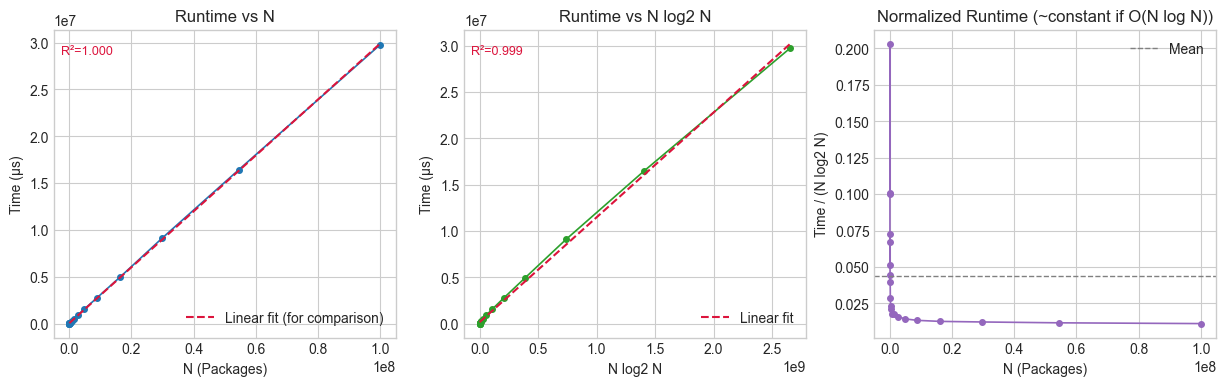

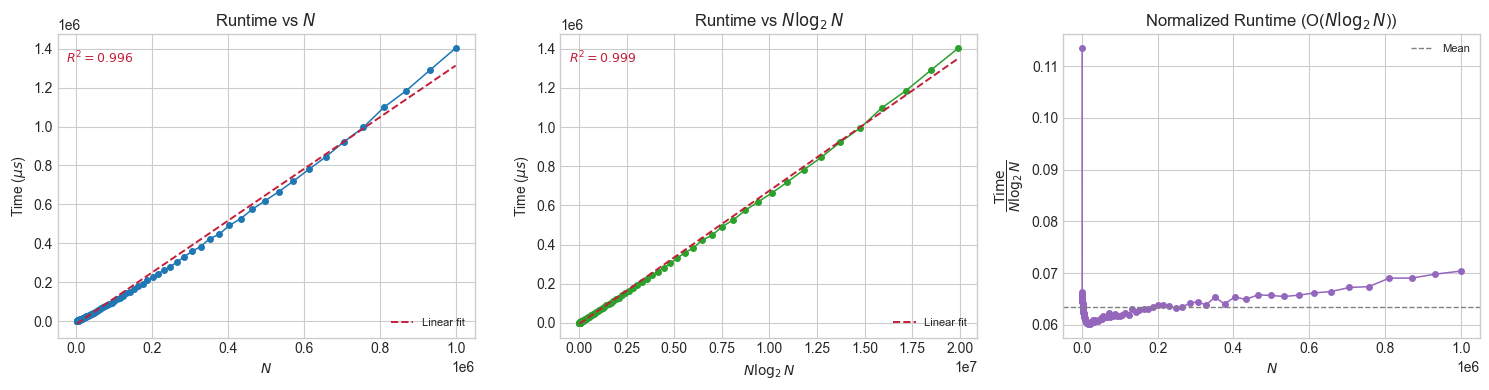

In [ ]:
# Q1: O(N log N) evidence plots (improved presentation)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

required = {'N(Packages)', 'Time(µs approx)'}
missing = required.difference(q1_df.columns)
if missing:
    raise ValueError(f"Missing columns for complexity plots: {missing}")

N = q1_df_c['N(Packages)'].astype(float).values
T = q1_df_c['Time(µs approx)'].astype(float).values
mask = (N > 1) & (T >= 0)
N = N[mask]
T = T[mask]
NlogN = N * np.log2(N)

def add_linear_fit(ax, x, y, label='Linear fit'):
    if len(x) >= 2 and np.any(x != x[0]):
        m, b = np.polyfit(x, y, 1)
        ax.plot(x, m*x + b, color='crimson', lw=1.5, linestyle='--', label=label)
        # Optional simple R^2
        y_pred = m*x + b
        ss_res = np.sum((y - y_pred)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - ss_res/ss_tot if ss_tot else float('nan')
        ax.text(0.02, 0.95, f"R²={r2:.3f}", transform=ax.transAxes,
                fontsize=9, va='top', ha='left', color='crimson')

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# 1. Time vs N
ax = axes[0]
ax.plot(N, T, marker='o', ms=4, lw=1.2, color='tab:blue')
add_linear_fit(ax, N, T, 'Linear fit (for comparison)')
ax.set_xlabel('N (Packages)')
ax.set_ylabel('Time (µs)')
ax.set_title('Runtime vs N')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False)

# 2. Time vs N log2 N (expect linear if O(N log N))
ax = axes[1]
# Sort for cleaner line
order = np.argsort(NlogN)
ax.plot(NlogN[order], T[order], marker='o', ms=4, lw=1.2, color='tab:green')
add_linear_fit(ax, NlogN, T, 'Linear fit')
ax.set_xlabel('N log2 N')
ax.set_ylabel('Time (µs)')
ax.set_title('Runtime vs N log2 N')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False)

# 3. Normalized: Time / (N log2 N) vs N (should be ~constant)
ax = axes[2]
normalized = T / NlogN
order = np.argsort(N)
ax.plot(N[order], normalized[order], marker='o', ms=4, lw=1.2, color='tab:purple')
ax.set_xlabel('N (Packages)')
ax.set_ylabel('Time / (N log2 N)')
ax.set_title('Normalized Runtime (~constant if O(N log N))')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# Horizontal reference line at mean
mean_norm = np.mean(normalized)
ax.axhline(mean_norm, color='gray', lw=1, linestyle='--', label='Mean')
ax.legend(frameon=False)
# Q1: O(N log N) evidence plots with LaTeX-style labels

import numpy as np
import matplotlib.pyplot as plt

required = {'N(Packages)', 'Time(µs approx)'}
missing = required.difference(q1_df.columns)
if missing:
    raise ValueError(f"Missing columns for complexity plots: {missing}")

N = q1_df['N(Packages)'].astype(float).values
T = q1_df['Time(µs approx)'].astype(float).values
mask = (N > 1) & (T >= 0)
N = N[mask]
T = T[mask]
NlogN = N * np.log2(N)

def add_linear_fit(ax, x, y, label='Linear fit'):
    if len(x) >= 2 and np.any(x != x[0]):
        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 200)
        ax.plot(xs, m*xs + b, color='#c41e3a', lw=1.4, ls='--', label=label)
        y_pred = m* x + b
        ss_res = np.sum((y - (m*x + b))**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - ss_res/ss_tot if ss_tot else float('nan')
        ax.text(0.02, 0.95, f"$R^2={r2:.3f}$", transform=ax.transAxes,
                fontsize=9, va='top', ha='left', color='#c41e3a')

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# 1. Time vs N
ax = axes[0]
ax.plot(N, T, 'o-', ms=4, lw=1.1, color='tab:blue')
add_linear_fit(ax, N, T, 'Linear fit')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'Time ($\mu s$)')
ax.set_title(r'Runtime vs $N$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False, fontsize=8)

# 2. Time vs N log_2 N
ax = axes[1]
order = np.argsort(NlogN)
ax.plot(NlogN[order], T[order], 'o-', ms=4, lw=1.1, color='tab:green')
add_linear_fit(ax, NlogN, T, 'Linear fit')
ax.set_xlabel(r'$N \log_{2} N$')
ax.set_ylabel(r'Time ($\mu s$)')
ax.set_title(r'Runtime vs $N \log_{2} N$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False, fontsize=8)

# 3. Normalized: Time / (N log_2 N) vs N
ax = axes[2]
normalized = T / NlogN
order = np.argsort(N)
ax.plot(N[order], normalized[order], 'o-', ms=4, lw=1.1, color='tab:purple')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\dfrac{\text{Time}}{N \log_{2} N}$')
ax.set_title(r'Normalized Runtime (O($N \log_{2} N$))')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
mean_norm = np.mean(normalized)
ax.axhline(mean_norm, color='gray', lw=1, ls='--', label='Mean')
ax.legend(frameon=False, fontsize=8)

fig.tight_layout()
plt.show()
fig.tight_layout()
plt.show()

Loaded Q1 (rows=100, cols=6): ['Test#', 'N(Packages)', 'Time(µs approx)', 'NumDuplicates', 'Memory(bytes)', 'Correct']
Loaded Q2 (rows=223324, cols=12): ['Test#', 'Query#', 'QueryListSize', 'Runtime(ms)', 'TreeSize', 'LeafCount', 'TotalQueries', 'Verification', 'MetroCities', 'TotalRuntimePerTest(ms)', 'AvgRuntimePerQuery(ms)', 'Memory(bytes)']
Loaded Q3 (rows=100, cols=9): ['Test#', 'Runtime(ms)', 'Nodes', 'Edges', 'MetroCount', 'Result(MeetTime)', 'Connected', 'Memory(bytes)', 'Verification']
Loaded Q1_copy (rows=20, cols=6): ['Test#', 'N(Packages)', 'Time(µs approx)', 'NumDuplicates', 'Memory(bytes)', 'Correct']
Saved q2_queries.png


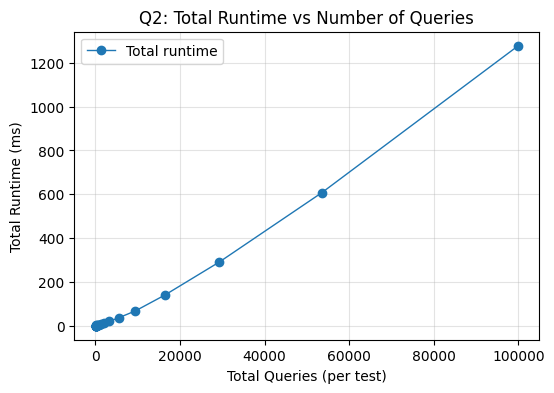

Saved q2_tree_runtime.png


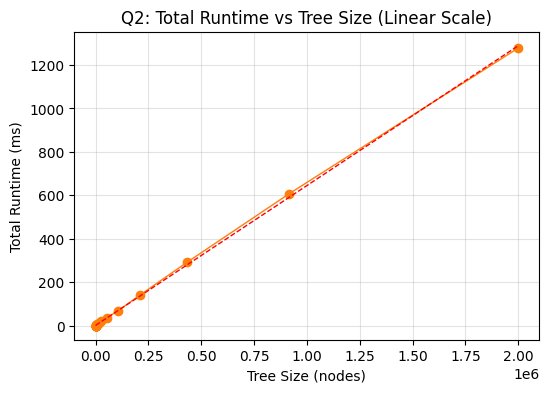

Saved q2_tree_memory.png


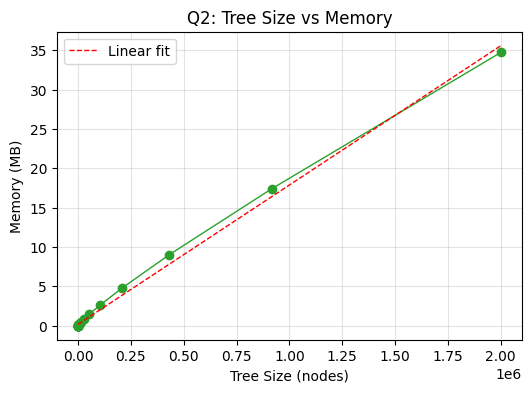

In [10]:
# Q2 Figures:
# (a) Total Runtime vs Number of Queries
# (b) Total Runtime vs Tree Size
# (c) Per-Query Runtime vs Query List Size
# (d) Tree Size vs Memory Size

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from pathlib import Path

# Paths
base = Path(r"c:/Users/aadii/OneDrive/Desktop/Github/IIScFirstSem/IntrotoScalableSys")
q1_path = base / "GRAPHSIMP" / "outputs_q1.csv"
q2_path = base / "GRAPHSIMP" / "outputs_q2.csv"
q3_path = base / "GRAPHSIMP" / "outputs_q3.csv"
q1_path_copy = base / "GRAPHSIMP" / "outputs_q1 copy.csv"

def load(label, path):
    if not path.exists():
        raise FileNotFoundError("Missing {}: {}".format(label, path))
    df = pd.read_csv(path)
    print("Loaded {} (rows={}, cols={}): {}".format(
        label, len(df), len(df.columns), list(df.columns)))
    return df

q1_df = load("Q1", q1_path)
q2_df = load("Q2", q2_path)
q3_df = load("Q3", q3_path)
q1_df_c=load("Q1_copy",q1_path_copy)

# Safety checks
needed_cols = {
    'Test#','Query#','QueryListSize','Runtime(ms)','TreeSize',
    'TotalQueries','TotalRuntimePerTest(ms)','AvgRuntimePerQuery(ms)','Memory(bytes)'
}
missing = needed_cols.difference(q2_df.columns)
if missing:
    raise ValueError(f"Q2 CSV missing columns: {missing}")

# Aggregate rows (first row per test has totals & memory)
q2_agg = q2_df[q2_df['TotalRuntimePerTest(ms)'].notna()].copy()
q2_agg['TotalRuntimePerTest(ms)'] = pd.to_numeric(q2_agg['TotalRuntimePerTest(ms)'], errors='coerce')
q2_agg['AvgRuntimePerQuery(ms)'] = pd.to_numeric(q2_agg['AvgRuntimePerQuery(ms)'], errors='coerce')
q2_agg['Memory(bytes)'] = pd.to_numeric(q2_agg['Memory(bytes)'], errors='coerce')
q2_agg['Memory(MB)'] = q2_agg['Memory(bytes)'] / (1024*1024.0)

# Per-query rows
q2_queries = q2_df.copy()
q2_queries['Runtime(ms)'] = pd.to_numeric(q2_queries['Runtime(ms)'], errors='coerce')
q2_queries['QueryListSize'] = pd.to_numeric(q2_queries['QueryListSize'], errors='coerce')

out_dir = Path(q2_path).parent  # same folder as outputs_q2.csv

def savefig(name):
    fp = out_dir / name
    plt.savefig(fp, dpi=140, bbox_inches='tight')
    print("Saved", fp.name)

# (a) Runtime vs Number of Queries
plt.figure(figsize=(6,4))
plt.plot(q2_agg['TotalQueries'], q2_agg['TotalRuntimePerTest(ms)'],
         marker='o', lw=1, label='Total runtime')
if len(q2_agg) >= 2:
    x = q2_agg['TotalQueries'].values
    y = q2_agg['TotalRuntimePerTest(ms)'].values
    m, b = np.polyfit(x, y, 1)
plt.xlabel('Total Queries (per test)')
plt.ylabel('Total Runtime (ms)')
plt.title('Q2: Total Runtime vs Number of Queries')
plt.grid(alpha=0.35)
plt.legend()
savefig('q2_queries.png')
plt.show()

# (b) Runtime vs Tree Size
plt.figure(figsize=(6,4))
plt.plot(q2_agg['TreeSize'], q2_agg['TotalRuntimePerTest(ms)'],
         marker='o', lw=1, color='tab:orange')
if len(q2_agg) >= 2:
    x = q2_agg['TreeSize'].values
    y = q2_agg['TotalRuntimePerTest(ms)'].values
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    plt.plot(xs, m*xs + b, 'r--', lw=1)
plt.xlabel('Tree Size (nodes)')
plt.ylabel('Total Runtime (ms)')
plt.title('Q2: Total Runtime vs Tree Size (Linear Scale)')
plt.grid(alpha=0.35)
savefig('q2_tree_runtime.png')
plt.show()
# (d) Tree Size vs Memory Size
plt.figure(figsize=(6,4))
plt.plot(q2_agg['TreeSize'], q2_agg['Memory(MB)'], marker='o', lw=1, color='tab:green')
if len(q2_agg) >= 2:
    x = q2_agg['TreeSize'].values
    y = q2_agg['Memory(MB)'].values
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    plt.plot(xs, m*xs + b, 'r--', lw=1, label='Linear fit')
plt.xlabel('Tree Size (nodes)')
plt.ylabel('Memory (MB)')
plt.title('Q2: Tree Size vs Memory')
plt.grid(alpha=0.35)
plt.legend()
savefig('q2_tree_memory.png')
plt.show()

Saved q3_roads.png


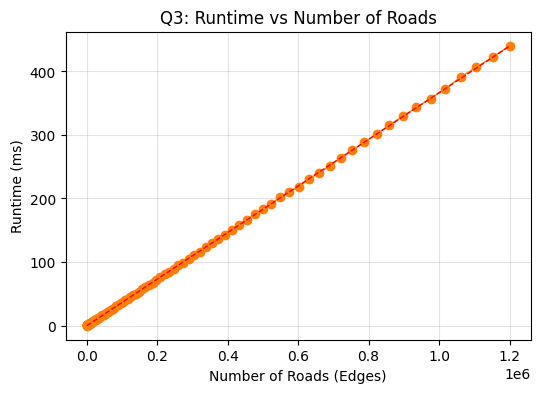

Saved q3_cities.png


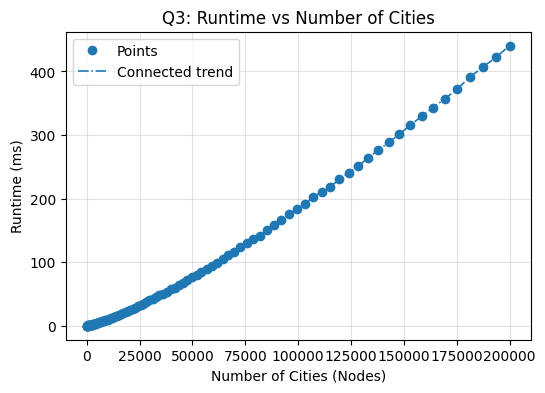

Saved q3_boosters.png


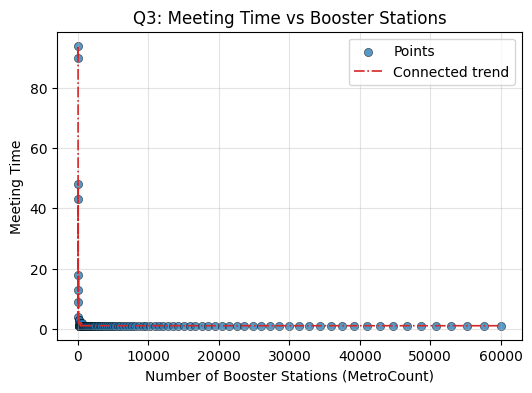

In [ ]:
# Q3 Figures:
# (a) Runtime vs Number of Cities (Nodes)
# (b) Runtime vs Number of Roads (Edges)
# (c) Meeting Time vs Number of Booster Stations (MetroCount)

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

needed = {'Runtime(ms)','Nodes','Edges','MetroCount','Result(MeetTime)'}
missing = needed.difference(q3_df.columns)
if missing:
    raise ValueError(f"Q3 CSV missing columns: {missing}")

q3_plot = q3_df.copy()
for col in ['Runtime(ms)','Nodes','Edges','MetroCount','Result(MeetTime)']:
    q3_plot[col] = pd.to_numeric(q3_plot[col], errors='coerce')

out_dir = Path(q3_path).parent

def savefig(name):
    fp = out_dir / name
    plt.savefig(fp, dpi=140, bbox_inches='tight')
    print("Saved", fp.name)
# (b) Runtime vs Number of Roads
plt.figure(figsize=(6,4))
plt.plot(q3_plot['Edges'], q3_plot['Runtime(ms)'], marker='o', lw=1, color='tab:orange')
if len(q3_plot) >= 2:
    x = q3_plot['Edges'].values
    y = q3_plot['Runtime(ms)'].values
    if np.any(x != x[0]):
        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, 'r--', lw=1)
plt.xlabel('Number of Roads (Edges)')
plt.ylabel('Runtime (ms)')
plt.title('Q3: Runtime vs Number of Roads')
plt.grid(alpha=0.35)
savefig('q3_roads.png')
plt.show()

# (a) Runtime vs Number of Cities  (updated: connected reference line instead of linear fit)
plt.figure(figsize=(6,4))
plt.plot(q3_plot['Nodes'], q3_plot['Runtime(ms)'], marker='o', lw=0, label='Points')
if len(q3_plot) >= 2:
    x_raw = q3_plot['Nodes'].values
    y_raw = q3_plot['Runtime(ms)'].values
    order = np.argsort(x_raw)
    xs = x_raw[order]
    ys = y_raw[order]
    plt.plot(xs, ys, '-.', color='tab:blue', lw=1.2, label='Connected trend')
# Old linear fit removed (was polyfit)
plt.xlabel('Number of Cities (Nodes)')
plt.ylabel('Runtime (ms)')
plt.title('Q3: Runtime vs Number of Cities')
plt.grid(alpha=0.35)
plt.legend(loc='best')
savefig('q3_cities.png')
plt.show()

# (c) Meeting Time vs Number of Booster Stations (updated: connected reference line)
meeting = q3_plot[q3_plot['Result(MeetTime)'] >= 0].copy()
plt.figure(figsize=(6,4))
plt.scatter(meeting['MetroCount'], meeting['Result(MeetTime)'],
            s=35, alpha=0.75, edgecolor='k', linewidth=0.4, label='Points')
if len(meeting) >= 2:
    xr = meeting['MetroCount'].values
    yr = meeting['Result(MeetTime)'].values
    order = np.argsort(xr)
    plt.plot(xr[order], yr[order], '-.', color='tab:red', lw=1.2, label='Connected trend')
# Old linear fit removed
plt.xlabel('Number of Booster Stations (MetroCount)')
plt.ylabel('Meeting Time')
plt.title('Q3: Meeting Time vs Booster Stations')
plt.grid(alpha=0.35)
plt.legend(loc='best')
savefig('q3_boosters.png')
plt.show()

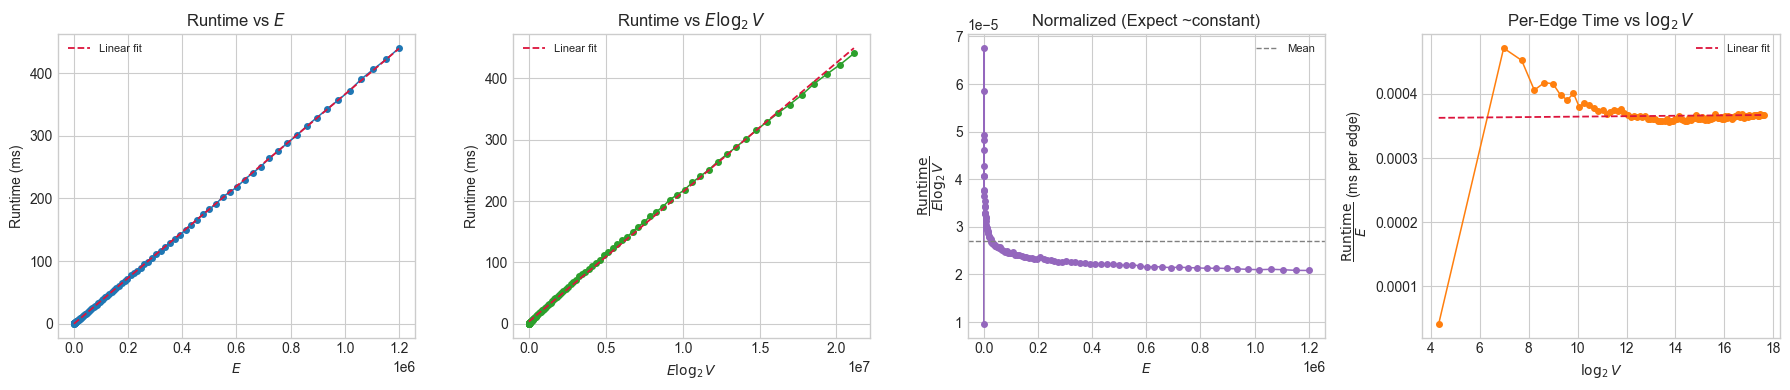

In [ ]:
# Q3: Evidence for O(E log V)

import numpy as np
import matplotlib.pyplot as plt

req = {'Runtime(ms)','Edges','Nodes'}
missing = req.difference(q3_plot.columns)
if missing:
    raise ValueError(f"Missing columns for O(E log V) analysis: {missing}")

df = q3_plot[['Runtime(ms)','Edges','Nodes']].dropna().copy()
df['Edges'] = df['Edges'].astype(float)
df['Nodes'] = df['Nodes'].astype(float)
df['Runtime(ms)'] = df['Runtime(ms)'].astype(float)

# Guard: only keep rows with Nodes > 1 and Edges > 0
df = df[(df['Nodes'] > 1) & (df['Edges'] > 0)]

if len(df) >= 2:
    df['E_logV'] = df['Edges'] * np.log2(df['Nodes'])
    df['Norm'] = df['Runtime(ms)'] / df['E_logV']
    df['TimePerEdge'] = df['Runtime(ms)'] / df['Edges']
    df['log2V'] = np.log2(df['Nodes'])
else:
    print("Not enough data points for E log V plots.")
    
def linfit(ax, x, y, color='crimson', label='Linear fit'):
    if len(x) >= 2 and np.any(x != x[0]):
        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 200)
        ax.plot(xs, m*xs + b, ls='--', lw=1.3, color=color, label=label)

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 4, figsize=(18,4))

# 1. Time vs E
ax = axes[0]
order = np.argsort(df['Edges'])
ax.plot(df['Edges'].values[order], df['Runtime(ms)'].values[order],
        'o-', ms=4, lw=1.1, color='tab:blue')
linfit(ax, df['Edges'].values, df['Runtime(ms)'].values)
ax.set_xlabel(r'$E$')
ax.set_ylabel('Runtime (ms)')
ax.set_title(r'Runtime vs $E$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False, fontsize=8)

# 2. Time vs E log2 V
ax = axes[1]
order = np.argsort(df['E_logV'])
ax.plot(df['E_logV'].values[order], df['Runtime(ms)'].values[order],
        'o-', ms=4, lw=1.1, color='tab:green')
linfit(ax, df['E_logV'].values, df['Runtime(ms)'].values)
ax.set_xlabel(r'$E \log_{2} V$')
ax.set_ylabel('Runtime (ms)')
ax.set_title(r'Runtime vs $E \log_{2} V$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False, fontsize=8)

# 3. Normalized: Time / (E log2 V) vs E
ax = axes[2]
order = np.argsort(df['Edges'])
ax.plot(df['Edges'].values[order], df['Norm'].values[order],
        'o-', ms=4, lw=1.1, color='tab:purple')
mean_norm = df['Norm'].mean()
ax.axhline(mean_norm, color='gray', lw=1, ls='--', label='Mean')
ax.set_xlabel(r'$E$')
ax.set_ylabel(r'$\dfrac{\text{Runtime}}{E \log_{2} V}$')
ax.set_title(r'Normalized (Expect ~constant)')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax.legend(frameon=False, fontsize=8)

# 4. Time per Edge vs log2 V
ax = axes[3]
order = np.argsort(df['log2V'])
ax.plot(df['log2V'].values[order], df['TimePerEdge'].values[order],
        'o-', ms=4, lw=1.1, color='tab:orange')
linfit(ax, df['log2V'].values, df['TimePerEdge'].values)
ax.set_xlabel(r'$\log_{2} V$')
ax.set_ylabel(r'$\dfrac{\text{Runtime}}{E}$ (ms per edge)')
ax.set_title(r'Per-Edge Time vs $\log_{2} V$')
ax.legend(frameon=False, fontsize=8)

fig.tight_layout()
plt.show()

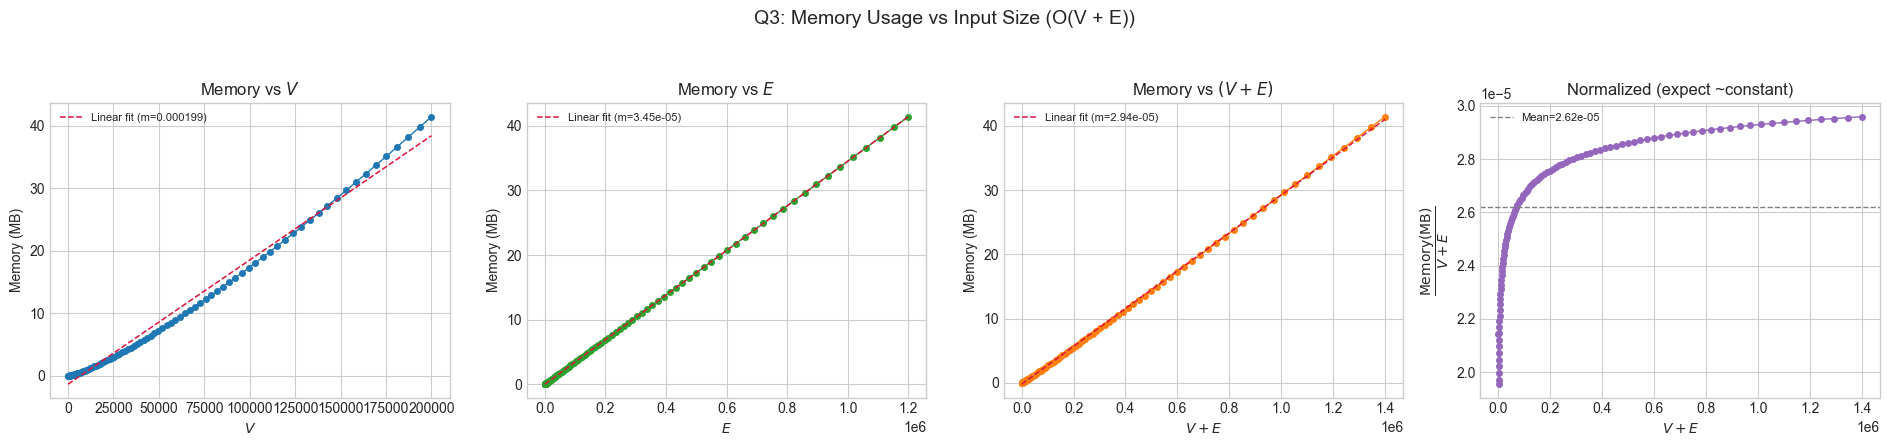

In [ ]:
# Q3: Memory vs Input Size (Space O(V + E))

import numpy as np
import matplotlib.pyplot as plt

need = {'Nodes','Edges','Memory(bytes)'}
missing = need.difference(q3_df.columns)
if missing:
    raise ValueError(f"Missing columns for Q3 memory plots: {missing}")

mem_q3 = q3_df[['Nodes','Edges','Memory(bytes)']].dropna().copy()
mem_q3['Nodes'] = mem_q3['Nodes'].astype(float)
mem_q3['Edges'] = mem_q3['Edges'].astype(float)
mem_q3['Memory(bytes)'] = mem_q3['Memory(bytes)'].astype(float)
mem_q3 = mem_q3[(mem_q3['Nodes'] >= 0) & (mem_q3['Edges'] >= 0) & (mem_q3['Memory(bytes)'] > 0)]
if mem_q3.empty:
    raise ValueError("No valid rows for Q3 memory plots.")

mem_q3['Memory(MB)'] = mem_q3['Memory(bytes)'] / (1024*1024.0)
mem_q3['VplusE'] = mem_q3['Nodes'] + mem_q3['Edges']
mem_q3 = mem_q3[mem_q3['VplusE'] > 0]
mem_q3['Norm'] = mem_q3['Memory(MB)'] / mem_q3['VplusE']

def linfit(ax, x, y, color='crimson', label='Linear fit'):
    if len(x) >= 2 and np.any(x != x[0]):
        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 200)
        ax.plot(xs, m*xs + b, ls='--', lw=1.1, color=color, label=f'{label} (m={m:.3g})')

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 4, figsize=(19,4.2))

# 1. Memory vs V
ax = axes[0]
order = np.argsort(mem_q3['Nodes'])
ax.plot(mem_q3['Nodes'].values[order], mem_q3['Memory(MB)'].values[order],
        'o-', ms=4, lw=1, color='tab:blue')
linfit(ax, mem_q3['Nodes'].values, mem_q3['Memory(MB)'].values)
ax.set_xlabel(r'$V$')
ax.set_ylabel('Memory (MB)')
ax.set_title(r'Memory vs $V$')
ax.legend(frameon=False, fontsize=8)

# 2. Memory vs E
ax = axes[1]
order = np.argsort(mem_q3['Edges'])
ax.plot(mem_q3['Edges'].values[order], mem_q3['Memory(MB)'].values[order],
        'o-', ms=4, lw=1, color='tab:green')
linfit(ax, mem_q3['Edges'].values, mem_q3['Memory(MB)'].values)
ax.set_xlabel(r'$E$')
ax.set_ylabel('Memory (MB)')
ax.set_title(r'Memory vs $E$')
ax.legend(frameon=False, fontsize=8)

# 3. Memory vs (V+E)
ax = axes[2]
order = np.argsort(mem_q3['VplusE'])
ax.plot(mem_q3['VplusE'].values[order], mem_q3['Memory(MB)'].values[order],
        'o-', ms=4, lw=1, color='tab:orange')
linfit(ax, mem_q3['VplusE'].values, mem_q3['Memory(MB)'].values)
ax.set_xlabel(r'$V + E$')
ax.set_ylabel('Memory (MB)')
ax.set_title(r'Memory vs $(V+E)$')
ax.legend(frameon=False, fontsize=8)

# 4. Normalized Memory / (V+E)
ax = axes[3]
order = np.argsort(mem_q3['VplusE'])
ax.plot(mem_q3['VplusE'].values[order], mem_q3['Norm'].values[order],
        'o-', ms=4, lw=1, color='tab:purple')
mean_norm = mem_q3['Norm'].mean()
ax.axhline(mean_norm, color='gray', lw=1, ls='--', label=f'Mean={mean_norm:.3g}')
ax.set_xlabel(r'$V + E$')
ax.set_ylabel(r'$\dfrac{\text{Memory(MB)}}{V+E}$')
ax.set_title('Normalized (expect ~constant)')
ax.legend(frameon=False, fontsize=8)

fig.suptitle('Q3: Memory Usage vs Input Size (O(V + E))', fontsize=14, y=1.05)
fig.tight_layout()
plt.show()